# Probabilistic machine learning
## Deep learning multi-model ensemble

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from tqdm import tqdm
from scipy.stats import norm

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Usecase: linear RUL

**Define the data function and parameter limits**

In [15]:
# Define linear function
def func(x, a, c, noise_amp = 0):
    y = a*x + c
    y = y + noise_amp * np.random.randn(len(x))
    return y

# Set parameter limits
x = np.arange(0,10,0.1)
a_range = (0, 2)
c_range = (0, 10)
noise_range = (0,5)

**Create at deep learning model architecture**

In [16]:
def create_model(input_shape=100, output_shape=2):
    model = Sequential()
    model.add(Dense(64, input_dim=100, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(2, activation='linear'))

    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

In [14]:
# Train the model

n_regessors = 100
n_training_obs = 1000
regressors = []
np.random.seed(2049)

for n in tqdm(range(n_regessors)):

    a_list = np.random.rand(n_training_obs)*(a_range[1] - a_range[0]) + a_range[0]
    c_list = np.random.rand(n_training_obs)*(c_range[1] - c_range[0]) + c_range[0]
    noise_list = np.random.rand(n_training_obs)*(noise_range[1] - noise_range[0]) + noise_range[0]

    targets = np.array(list(zip(a_list,c_list)))
    targets_with_noise = np.array(list(zip(a_list,c_list,noise_list)))
    features = np.array([func(x,a,c,noise) for a, c, noise in targets_with_noise])

    reg = create_model()
    reg.fit(features, targets, epochs=50, batch_size=32, verbose=0)
    regressors.append(reg)

print('Done')

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [02:12<00:00,  1.32s/it]

Done


In [15]:
a_list = np.random.rand(n_training_obs)*(a_range[1] - a_range[0]) + a_range[0]
c_list = np.random.rand(n_training_obs)*(c_range[1] - c_range[0]) + c_range[0]
noise_list = np.random.rand(n_training_obs)*(noise_range[1] - noise_range[0]) + noise_range[0]

targets = np.array(list(zip(a_list,c_list)))
targets_with_noise = np.array(list(zip(a_list,c_list,noise_list)))
features = np.array([func(x,a,c,noise) for a, c, noise in targets_with_noise])

a_pred = []
c_pred = []

for reg in tqdm(regressors):
    result = reg.predict(features)
    a, c = result.T
    a_pred.append(a)
    c_pred.append(c)

a_pred = np.array(a_pred).T
c_pred = np.array(c_pred).T

a_mean = a_pred.mean(axis=1)
c_mean = c_pred.mean(axis=1)

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 16.61it/s]


In [18]:
idx = 0

limit = 30
x30 = np.arange(0,30,0.1)
rul_list = []

for idx_reg in range(n_regessors):
    y_pred_idx = func(x30, a_pred[idx][idx_reg], c_pred[idx][idx_reg])
    plt.plot(x30, y_pred_idx, color='grey', alpha=0.1)
    idx_rul = np.abs(y_pred_idx - limit).argmin()
    rul = x30[idx_rul]
    rul_list.append(rul)

y_pred_mean = func(x30, a_mean[idx], c_mean[idx])
plt.plot(x30, y_pred_mean, color='orange')

rul_list = np.array(rul_list)
rul_mean = rul_list.mean()
rul_std = rul_list.std()
rul_pdf = norm.pdf(x30, rul_mean, rul_std)
plt.plot(x30, (rul_pdf*15)+30, color='purple')

plt.hlines(limit, 0, 30, color='red')
plt.scatter(x, features[idx])

plt.xlim(-1,25)
plt.ylim(0,50)
plt.show()

NameError: name 'a_pred' is not defined

In [19]:
idx = 2

limit = 30
x30 = np.arange(0,30,0.1)
rul_list = []

for idx_reg in range(n_regessors):
    y_pred_idx = func(x30, a_pred[idx][idx_reg], c_pred[idx][idx_reg])
    plt.plot(x30, y_pred_idx, color='grey', alpha=0.1)
    idx_rul = np.abs(y_pred_idx - limit).argmin()
    rul = x30[idx_rul]
    rul_list.append(rul)

y_pred_mean = func(x30, a_mean[idx], c_mean[idx])
plt.plot(x30, y_pred_mean, color='orange')

rul_list = np.array(rul_list)
rul_mean = rul_list.mean()
rul_std = rul_list.std()
rul_pdf = norm.pdf(x30, rul_mean, rul_std)
plt.plot(x30, (rul_pdf*15)+30, color='purple')

plt.hlines(limit, 0, 30, color='red')
plt.scatter(x, features[idx])

plt.xlim(-1,25)
plt.ylim(0,50)
plt.show()

NameError: name 'a_pred' is not defined

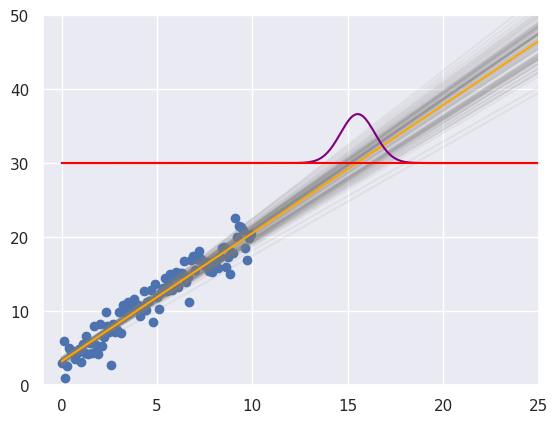

In [21]:
idx = 3

limit = 30
x30 = np.arange(0,30,0.1)
rul_list = []

for idx_reg in range(n_regessors):
    y_pred_idx = func(x30, a_pred[idx][idx_reg], c_pred[idx][idx_reg])
    plt.plot(x30, y_pred_idx, color='grey', alpha=0.1)
    idx_rul = np.abs(y_pred_idx - limit).argmin()
    rul = x30[idx_rul]
    rul_list.append(rul)

y_pred_mean = func(x30, a_mean[idx], c_mean[idx])
plt.plot(x30, y_pred_mean, color='orange')

rul_list = np.array(rul_list)
rul_mean = rul_list.mean()
rul_std = rul_list.std()
rul_pdf = norm.pdf(x30, rul_mean, rul_std)
plt.plot(x30, (rul_pdf*15)+30, color='purple')

plt.hlines(limit, 0, 30, color='red')
plt.scatter(x, features[idx])

plt.xlim(-1,25)
plt.ylim(0,50)
plt.show()

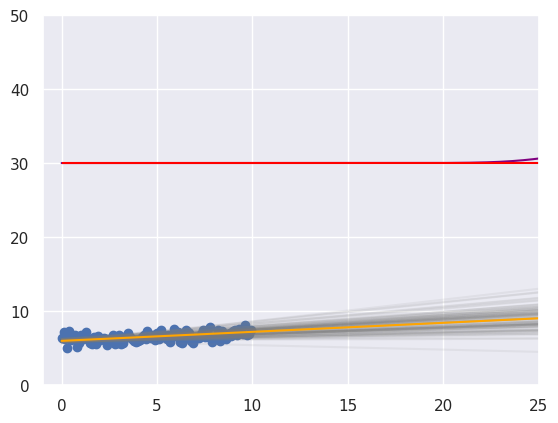

In [22]:
idx = 4

limit = 30
x30 = np.arange(0,30,0.1)
rul_list = []

for idx_reg in range(n_regessors):
    y_pred_idx = func(x30, a_pred[idx][idx_reg], c_pred[idx][idx_reg])
    plt.plot(x30, y_pred_idx, color='grey', alpha=0.1)
    idx_rul = np.abs(y_pred_idx - limit).argmin()
    rul = x30[idx_rul]
    rul_list.append(rul)

y_pred_mean = func(x30, a_mean[idx], c_mean[idx])
plt.plot(x30, y_pred_mean, color='orange')

rul_list = np.array(rul_list)
rul_mean = rul_list.mean()
rul_std = rul_list.std()
rul_pdf = norm.pdf(x30, rul_mean, rul_std)
plt.plot(x30, (rul_pdf*15)+30, color='purple')

plt.hlines(limit, 0, 30, color='red')
plt.scatter(x, features[idx])

plt.xlim(-1,25)
plt.ylim(0,50)
plt.show()

**Correlate std to error**

In [23]:
rul_true_list = []
rul_mean_list = []
rul_std_list = []
x100 = np.arange(0, 100, 0.1)
limit = 30

for idx, a in tqdm(enumerate(a_list)):
    # Find the true RUL
    c = c_list[idx]
    y_true = func(x100, a, c)
    rul_true = x100[np.abs(y_true - limit).argmin()]
    rul_true_list.append(rul_true)

    # Calculate the probabilitic 
    rul_discrete_dist = []
    for idx_reg in range(n_regessors):
        y_pred_idx = func(x100, a_pred[idx][idx_reg], c_pred[idx][idx_reg])
        idx_rul = np.abs(y_pred_idx - limit).argmin()
        rul = x100[idx_rul]
        rul_discrete_dist.append(rul)
    
    rul_mean_list.append(np.mean(rul_discrete_dist))
    rul_std_list.append(np.std(rul_discrete_dist))

1000it [00:04, 244.07it/s]


In [24]:
data = {'noise':noise_list, 'rul_true':rul_true_list, 'rul_pred_mean':rul_mean_list, 'rul_pred_std':rul_std_list}
df = pd.DataFrame(data)
df['rul_pred_error'] = df.rul_pred_mean - df.rul_true
df['rul_pred_error_abs'] = df.rul_pred_error.abs()

# remove ruls that are very far in the future
df = df.loc[df.rul_true <= 80, :]
df.reset_index(drop=True, inplace=True)

df

,noise,rul_true,rul_pred_mean,rul_pred_std,rul_pred_error,rul_pred_error_abs
0,2.868773,12.2,11.236,0.980665,-0.964,0.964
1,2.917565,61.5,59.009,22.102218,-2.491,2.491
2,2.089217,38.6,42.815,11.051230,4.215,4.215
3,1.629763,15.4,15.518,0.903037,0.118,0.118
4,0.827382,50.4,47.372,6.798001,-3.028,3.028
...,...,...,...,...,...,...
837,1.563743,40.1,44.530,6.650226,4.430,4.430
838,1.365393,11.5,11.689,0.706526,0.189,0.189
839,1.299225,24.8,24.088,1.938055,-0.712,0.712
840,2.133508,21.9,21.700,2.046900,-0.200,0.200


/tmp/ipykernel_104/242634322.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  colorbar = plt.colorbar(label='Noise')


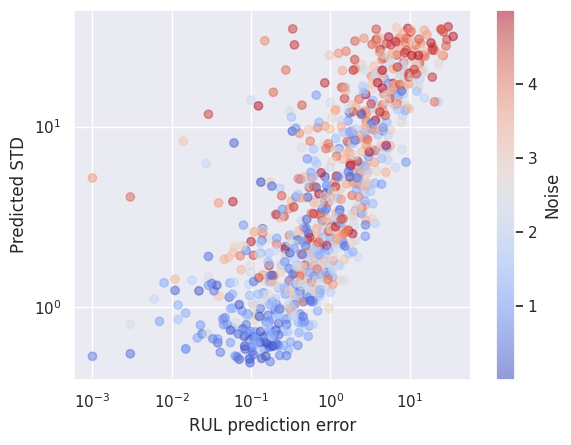

In [25]:
x = df.rul_pred_error_abs
y = df.rul_pred_std
z = df.noise
plt.scatter(x, y, c=z, cmap='coolwarm', alpha=0.5)
colorbar = plt.colorbar(label='Noise')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('RUL prediction error')
plt.ylabel('Predicted STD')
plt.show()

## Usecase: Linear RUL with dropped data

In [66]:
from tensorflow.keras.layers import Masking

In [69]:
def drop_data2(array, drop_frac_list):
    '''drop_frac: list of [0,1]'''
    for array_idx, x in enumerate(array):
        drop_frac = drop_frac_list[array_idx]
        n_drop = int(len(x) * drop_frac)
        idx_list = np.arange(len(x))
        idx_drop = np.random.choice(idx_list, size = n_drop, replace=False)
        x[idx_drop] = 0
        # for idx in idx_drop:
        #     x[idx] = np.nan
        array[array_idx] = x
        
    return array

def drop_data2(array, drop_frac_list):
    '''drop_frac: list of [0,1]'''
    for array_idx, x in enumerate(array):
        x = x.astype(float)  # Ensure x can hold np.nan
        drop_frac = drop_frac_list[array_idx]
        n_drop = int(len(x) * drop_frac)
        idx_drop = np.random.choice(len(x), size=n_drop, replace=False)
        x[idx_drop] = np.nan
        array[array_idx] = x
    return array

def create_model2(input_shape=100, output_shape=2):
    model = Sequential()
    model.add(Masking(mask_value=np.nan, input_shape=input_shape))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(2, activation='linear'))

    model.compile(optimizer='adam', loss='mean_squared_error')

    return model


# Set parameter limits
x = np.arange(0,10,0.1)
a_range = (0, 2)
c_range = (0, 10)
noise_range = (0,5)
drop_range = (0,0.9)

In [38]:
import tensorflow as tf

In [39]:
sparse_array = np.array([[1, 0, 0, 8], [0, 0, 0, 0], [0, 0, 3, 0]])

sparse_tensor = tf.sparse.from_dense(sparse_array)

In [23]:
def pprint_sparse_tensor(st):
  s = "<SparseTensor shape=%s \n values={" % (st.dense_shape.numpy().tolist(),)
  for (index, value) in zip(st.indices, st.values):
    s += f"\n  %s: %s" % (index.numpy().tolist(), value.numpy().tolist())
  return s + "}>"

In [24]:
pprint_sparse_tensor(sparse_tensor)

'<SparseTensor shape=[3, 4] \n values={\n  [0, 0]: 1\n  [0, 3]: 8\n  [2, 2]: 3}>'

In [52]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='tensorflow')


In [60]:
# # Train the model

# n_regessors = 100
# n_training_obs = 1000
# regressors = []
# np.random.seed(2049)

# for n in tqdm(range(n_regessors)):
#     seed = np.random.randint(100000)

#     a_list = np.random.rand(n_training_obs)*(a_range[1] - a_range[0]) + a_range[0]
#     c_list = np.random.rand(n_training_obs)*(c_range[1] - c_range[0]) + c_range[0]
#     noise_list = np.random.rand(n_training_obs)*(noise_range[1] - noise_range[0]) + noise_range[0]

#     targets = np.array(list(zip(a_list,c_list)))
#     targets_with_noise = np.array(list(zip(a_list,c_list,noise_list)))
#     features = np.array([func(x,a,c,noise) for a, c, noise in targets_with_noise])
    
#     drop_frac_list = np.random.rand(n_training_obs)*(drop_range[1] - drop_range[0]) + drop_range[0]
#     features = drop_data(features, drop_frac_list)

#     X_train, X_val, y_train, y_val = train_test_split(features, targets, test_size=0.2)
    
#     X_train_sparse = tf.sparse.from_dense(X_train)
#     X_val_sparse = tf.sparse.from_dense(X_val)

#     reg = create_model()
#     reg.fit(X_train_sparse, y_train, validation_data=(X_val_sparse, y_val), epochs=50, batch_size=32, verbose=0)
#     regressors.append(reg)

# print('Done')

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [04:56<00:00,  2.97s/it]

Done


In [74]:
def drop_data2(array, drop_frac_list):
    '''drop_frac: list of [0,1]'''
    for array_idx, x in enumerate(array):
        x = x.astype(float)  # Ensure x can hold np.nan
        drop_frac = drop_frac_list[array_idx]
        n_drop = int(len(x) * drop_frac)
        idx_drop = np.random.choice(len(x), size=n_drop, replace=False)
        x[idx_drop] = np.nan
        array[array_idx] = x
    return array

def create_model2(input_shape=(100,), output_shape=2):
    model = Sequential()
    model.add(Masking(mask_value=np.nan, input_shape=input_shape))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(2, activation='linear'))

    model.compile(optimizer='adam', loss='mean_squared_error')

    return model


# Set parameter limits
x = np.arange(0,10,0.1)
a_range = (0, 2)
c_range = (0, 10)
noise_range = (0,5)
drop_range = (0,0.9)


n_regessors = 100
n_training_obs = 1000
regressors = []
np.random.seed(2049)

for n in tqdm(range(n_regessors)):
    seed = np.random.randint(100000)

    a_list = np.random.rand(n_training_obs)*(a_range[1] - a_range[0]) + a_range[0]
    c_list = np.random.rand(n_training_obs)*(c_range[1] - c_range[0]) + c_range[0]
    noise_list = np.random.rand(n_training_obs)*(noise_range[1] - noise_range[0]) + noise_range[0]

    targets = np.array(list(zip(a_list,c_list)))
    targets_with_noise = np.array(list(zip(a_list,c_list,noise_list)))
    # ... [previous code remains the same] ...

    features = np.array([func(x, a, c, noise) for a, c, noise in targets_with_noise])
    
    # Convert features to float to handle np.nan
    features = features.astype(float)
    
    drop_frac_list = np.random.uniform(drop_range[0], drop_range[1], n_training_obs)
    features = drop_data2(features, drop_frac_list)

    X_train, X_val, y_train, y_val = train_test_split(features, targets, test_size=0.2)

    reg = create_model2()
    reg.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=0)
    regressors.append(reg)

print('Done')

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [03:25<00:00,  2.06s/it]

Done


In [79]:
seed = np.random.randint(100000)
a_list = np.random.rand(n_training_obs)*(a_range[1] - a_range[0]) + a_range[0]
c_list = np.random.rand(n_training_obs)*(c_range[1] - c_range[0]) + c_range[0]
noise_list = np.random.rand(n_training_obs)*(noise_range[1] - noise_range[0]) + noise_range[0]
drop_frac_list = np.random.rand(n_training_obs)*(drop_range[1] - drop_range[0]) + drop_range[0]

targets = np.array(list(zip(a_list,c_list)))
targets_with_noise = np.array(list(zip(a_list,c_list,noise_list)))
features = np.array([func(x,a,c,noise) for a, c, noise in targets_with_noise])
features = drop_data2(features, drop_frac_list)

a_pred = []
c_pred = []

for reg in tqdm(regressors):
    result = reg.predict(features)
    a, c = result.T
    a_pred.append(a)
    c_pred.append(c)

a_pred = np.array(a_pred).T
c_pred = np.array(c_pred).T

a_mean = a_pred.mean(axis=1)
c_mean = c_pred.mean(axis=1)

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 21.52it/s]


In [80]:
a_pred

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

/mnt/c/Users/jwilliams/Documents/GitHub/probablistic_deep_learning/env/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/mnt/c/Users/jwilliams/Documents/GitHub/probablistic_deep_learning/env/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


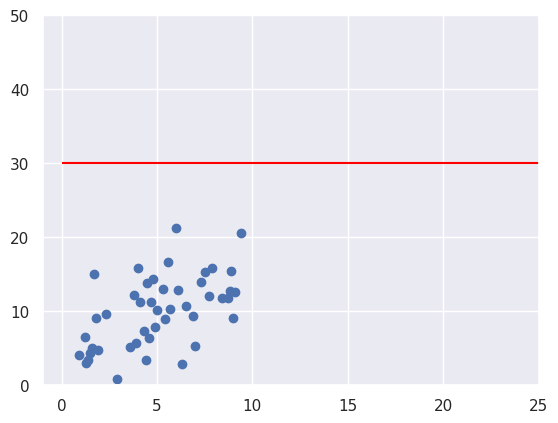

In [81]:
idx = 2

limit = 30
x30 = np.arange(0,30,0.1)
rul_list = []

for idx_reg in range(n_regessors):
    y_pred_idx = func(x30, a_pred[idx][idx_reg], c_pred[idx][idx_reg])
    plt.plot(x30, y_pred_idx, color='grey', alpha=0.1)
    idx_rul = np.abs(y_pred_idx - limit).argmin()
    rul = x30[idx_rul]
    rul_list.append(rul)

y_pred_mean = func(x30, a_mean[idx], c_mean[idx])
plt.plot(x30, y_pred_mean, color='orange')

rul_list = np.array(rul_list)
rul_mean = rul_list.mean()
rul_std = rul_list.std()
rul_pdf = norm.pdf(x30, rul_mean, rul_std)
plt.plot(x30, (rul_pdf*15)+30, color='purple')

plt.hlines(limit, 0, 30, color='red')
plt.scatter(x, features[idx])

plt.xlim(-1,25)
plt.ylim(0,50)
plt.show()